## Live Coding 1

Vamos a construir paso a paso un pipeline básico de Machine Learning supervisado utilizando Python y Scikit-learn.

1. Carga de un dataset sencillo con pandas


In [2]:
import pandas as pd
import numpy as np

# Creamos un dataset simple
np.random.seed(42)

X = np.random.rand(100, 1) * 10 # np.random.rand(100, 1) : crea algo con 100 filas y 1 columna.
y = 3 * X.flatten() + 5 + np.random.randn(100) * 2 # flatten() convierte un arreglo multidimensional en uno de una sola dimensión.

df = pd.DataFrame({
    "feature": X.flatten(),
    "target": y
})

df.head()


,feature,target
0,3.745401,16.410298
1,9.507143,32.923414
2,7.319939,27.143340
3,5.986585,18.984617
4,1.560186,9.241215


2. División en variables predictoras y variable objetivo


In [3]:
X = df[["feature"]]  # siempre como DataFrame
y = df["target"]     # Serie


X → variables explicativas

y → variable objetivo

supervisado → conocemos la respuesta

3. Separación en conjunto de entrenamiento y test

In [4]:
# sklearn es scikit-learn, una librería de ML.
# model_selection es el módulo donde están cosas para dividir datos y evaluar modelos.
# train_test_split es una función que sirve para separar tu dataset en dos partes:
# train (entrenamiento): con lo que el modelo “aprende”
# test (prueba): con lo que evaluas si generaliza bien
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42 #20% para test, 80% para train
)


4. Entrenamiento de un modelo simple (Regresión lineal)

In [5]:
# sklearn.linear_model es el módulo de scikit-learn con modelos lineales.
# LinearRegression es una clase que implementa regresión lineal (la típica recta).
from sklearn.linear_model import LinearRegression

# creando el objeto del modelo
model = LinearRegression()
# Entrenas el modelo
model.fit(X_train, y_train)


LinearRegression()

In [6]:
model.coef_

array([2.91972946])

In [7]:
model.intercept_

np.float64(5.285826638917127)

5. Predicción sobre datos de test

In [8]:
# calcula las predicciones usando la recta que aprendió en fit()
y_pred = model.predict(X_test)

6. Cálculo de métricas básicas (MAE, R²)

In [9]:
# trae dos formas de medir qué tan bien predijo tu modelo comparando y_test (lo real) vs y_pred (lo predicho).
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("R²:", r2)


MAE: 1.1826851558379565
R²: 0.9686345415489115


MAE: “En promedio, me estoy equivocando por X unidades”.

r2_score (R²): El coeficiente de determinación.

Interpretación simple:
* 1.0 → predicción perfecta
* 0.0 → el modelo no mejora a “predecir el promedio”
* < 0 → peor que predecir el promedio

R² ≈ 0.9686

Esto significa que el modelo explica aproximadamente: 96.86% de la variabilidad de y

Eso es altísimo.

7. Visualización con matplotlib

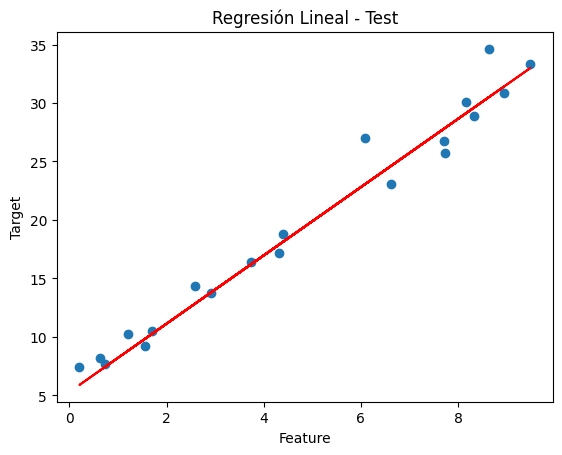

In [10]:
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red')
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("Regresión Lineal - Test")
plt.show()


8. Análisis del resultado obtenido

* ¿Hay linealidad clara?: Sí.

    En el gráfico se ve que cuando la variable aumenta, el resultado también aumenta.
    Los puntos más o menos siguen una línea.

    No es perfecta, pero se nota una tendencia.
    Y eso es suficiente para que una regresión lineal tenga sentido.

    Si los puntos estuvieran completamente desordenados, ahí ya sospecharíamos.

* Si en vez de np.random.rand(100, 1) * 10 hicieras:

    X = np.random.rand(100, 1) * 1000

## Live Coding 2

Trabajaremos un caso de regresión simple aplicando regresión lineal sobre un conjunto de datos sintéticos.

1. Cargar los datos de ejemplo

In [11]:
import numpy as np
import pandas as pd

np.random.seed(42)

X = np.linspace(0, 10, 100) # np.linspace(a, b, n) crea n valores igualmente espaciados desde a hasta b (incluyéndolos)
y = 2*X + 0.5*X**2 + np.random.randn(100)*5  # leve comportamiento no lineal

df = pd.DataFrame({"X": X, "y": y})


2. Visualizar la relación entre variables


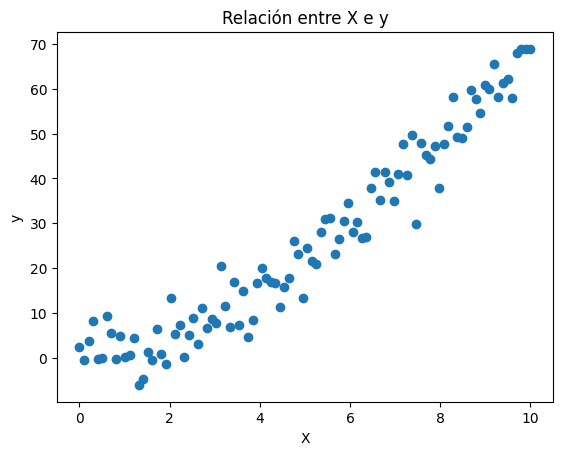

In [12]:
import matplotlib.pyplot as plt

plt.scatter(df["X"], df["y"])
plt.xlabel("X")
plt.ylabel("y")
plt.title("Relación entre X e y")
plt.show()


3. Ajustar un modelo de regresión lineal


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df[["X"]]
y = df["y"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

y_pred_lin = lin_model.predict(X_test)


4. Analizar la ecuación generada

In [14]:
print("Intercepto:", lin_model.intercept_)
print("Pendiente:", lin_model.coef_)


Intercepto: -9.625338292656345
Pendiente: [7.15481765]


5. Evaluar el rendimiento del modelo con R²


In [15]:
from sklearn.metrics import r2_score

r2_lin = r2_score(y_test, y_pred_lin)
print("R² Lineal:", r2_lin)


R² Lineal: 0.9245803674197586


6. Interpretar los coeficientes


Intercepto → valor cuando X = 0

Coeficiente → cuánto cambia y cuando X aumenta en 1

R² ≈ 0.9245

Interpretación simple:
* 1.0 → predicción perfecta
* 0.0 → el modelo no mejora a “predecir el promedio”
* < 0 → peor que predecir el promedio

Esto significa que el modelo explica aproximadamente: 92.45% de la variabilidad de y

7. Comparar con regresión polinómica

In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly_model = make_pipeline(
    PolynomialFeatures(degree=2),
    LinearRegression()
)

poly_model.fit(X_train, y_train)

y_pred_poly = poly_model.predict(X_test)

r2_poly = r2_score(y_test, y_pred_poly)

print("R² Polinómico:", r2_poly)


R² Polinómico: 0.9612016305556278


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


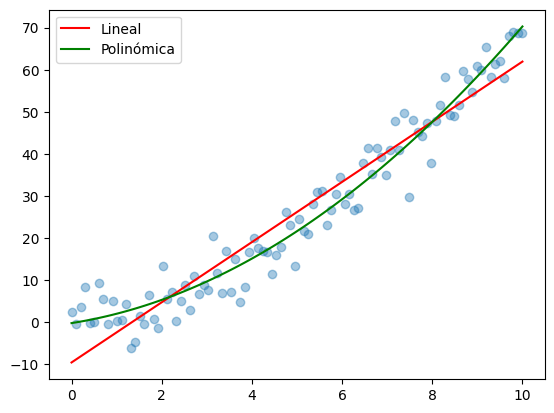

In [17]:
X_range = np.linspace(0,10,100).reshape(-1,1)

plt.scatter(X, y, alpha=0.4)
plt.plot(X_range, lin_model.predict(X_range), label="Lineal", color="red")
plt.plot(X_range, poly_model.predict(X_range), label="Polinómica", color="green")
plt.legend()
plt.show()


8. Discusión grupal de resultados

R² lineal ≈ 0.9246

R² polinómico ≈ 0.9612

Primero, interpretación fría:

El modelo polinómico explica aproximadamente 96.1% de la variabilidad,
mientras que el lineal explica 92.5%.

O sea, el polinómico ajusta mejor los datos.